# Binning
Binning is a common practice to simplify data.  Usually, binning refers to grouping numeric values into categories.  Sometimes the term >binning< is used to group categories into fewer categories.

## Binning or Data Binning (Numerical Variables)
Binning is important to convert numerical data into categories (strings) when numerical data is not desired.  Numeric values are assigned a categorgical label.  Similar numeric values are assigned the same label.  Numeric values are similar if they fall within the same bin boundaries.

#### Our objective
- We want a categorical array instead of a numeric variable
- The categories in the categorical variable are ordinal like "Low", "Med", and "High"
> - In this example we do not consider the ordinality 
> - We could consider the ordinality (not shown)

In [1]:
# Packages
import numpy as np

In [2]:
# Numeric VariableVariable
x = np.array([81,3,3,4,4,5,5,5,5,5,5,5,5,5,5,6,6,7,7,7,7,8,8,9,12,24,24,25])
x

array([81,  3,  3,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        7,  7,  7,  7,  8,  8,  9, 12, 24, 24, 25])

### Equal-width Binning
Equal-width binning is the standard or typical binning.  Each bin width is the same size.  The bin width is the difference between the max allowed value and the min allowed value of a bin.

In [3]:
# Equal-width Binning
# Determine the boundaries of the bins
NumberOfBins = 3
BinWidth = (max(x) - min(x))/NumberOfBins
MinBin1 = float('-inf')
MaxBin1 = min(x) + 1 * BinWidth
MaxBin2 = min(x) + 2 * BinWidth
MaxBin3 = float('inf')

print(" Bin 1 is greater than", MinBin1, "up to", MaxBin1)
print(" Bin 2 is greater than", MaxBin1, "up to", MaxBin2)
print(" Bin 3 is greater than", MaxBin2, "up to", MaxBin3)

 Bin 1 is greater than -inf up to 29.0
 Bin 2 is greater than 29.0 up to 55.0
 Bin 3 is greater than 55.0 up to inf


In [4]:
# Create the categorical variable
# Start with an empty array that is the same size as x
xBinnedEqW = np.empty(len(x), object) # np.full(len(x), "    ")
xBinnedEqW

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None], dtype=object)

In [5]:
# The conditions at the boundaries should consider the difference 
# between less than (<) and less than or equal (<=) 
# and greater than (>) and greater than or equal (>=)
xBinnedEqW[(x > MinBin1) & (x <= MaxBin1)] = "Low"
xBinnedEqW[(x > MaxBin1) & (x <= MaxBin2)] = "Med"
xBinnedEqW[(x > MaxBin2) & (x <= MaxBin3)] = "High"
print(" x binned into 3 equal-width bins:", xBinnedEqW)

 x binned into 3 equal-width bins: ['High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low']


### Equal-frequency Binning
Equal-frequency binning is less common than standard or typical binning.  In equal-frequency binning, each bin has approximately the same number of items. The bin widths usually differ from bin to bin. 

In [6]:
# Equal-frequency Binning
ApproxBinCount = np.round(len(x)/NumberOfBins)
print(" Each bin should contain approximately %d elements." % ApproxBinCount)

 Each bin should contain approximately 9 elements.


In [7]:
# Set bin bounds so that each has bin has approximately the same number
# of items.
# Find boundaries that divide the sorted variable into bins of approximately
# the right number of elements.
print(" Sort the variable:", np.sort(x))

 Sort the variable: [ 3  3  4  4  5  5  5  5  5  5  5  5  5  5  6  6  7  7  7  7  8  8  9 12
 24 24 25 81]


In [8]:
# One solution would be bins with 14, 6, and 8 elements:
# 3,3,4,4,5,5,5,5,5,5,5,5,5,5,| 6,6,7,7,7,7,| 8,8,9,12,24,24,25,81
MinBin1 = float('-inf')
MaxBin1 = 5.5
MaxBin2 = 7.5
MaxBin3 = float('+inf')

# Create the categorical variable
# Start with an empty array that is the same size as x
xBinnedEqF = np.empty(len(x), object) # np.full(len(x), "    ")
xBinnedEqF[(MinBin1 < x) & (x <= MaxBin1)] = "Low"
xBinnedEqF[(MaxBin1 < x) & (x <= MaxBin2)] = "Med"
xBinnedEqF[(MaxBin2 < x) & (x  < MaxBin3)] = "High"

print(" x binned into 3 equal-freq1uency bins: ")
print(xBinnedEqF)

 x binned into 3 equal-freq1uency bins: 
['High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Med' 'Med' 'Med' 'Med' 'Med' 'Med' 'High' 'High'
 'High' 'High' 'High' 'High' 'High']


## Binning or Consolidating Categories
Binning categories is used to simplify category variables.  Binning category variables can also be called consolidation.  Binning category variable converts a category column (strings) into another category column.  Similar categories are assigned the same label.  Categories are similar by a users definition.

### Our objective
- We want a simpler categorical array

In [9]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Category Variable
The following variable contains the colors of various items. These colors were enterred into a database from multiple users who used different color names for similar colors.

In [11]:
# Category Variable
Color = np.array(['red','royal blue','blue','blue','navy','vermillion',
              'red','fire red','green','teal','turquoise',
              'green','hunter green','green','green','dark grey',
              'dark grey','coal','coal','coal','coal','aqua', 
              'aqua','sky blue','sangria','pink','pink',
              'fire red'])
Color

array(['red', 'royal blue', 'blue', 'blue', 'navy', 'vermillion', 'red',
       'fire red', 'green', 'teal', 'turquoise', 'green', 'hunter green',
       'green', 'green', 'dark grey', 'dark grey', 'coal', 'coal', 'coal',
       'coal', 'aqua', 'aqua', 'sky blue', 'sangria', 'pink', 'pink',
       'fire red'], dtype='<U12')

### Complexity
The number of categories affects the complexity of the category variable

 The variable contains 16 different colors.


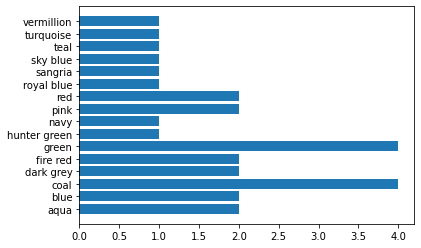

In [12]:
UniqueColor, FrequencyOfColor = np.unique(Color, return_counts=True)
print(" The variable contains",len(UniqueColor),"different colors.")
plt.barh(y=UniqueColor, width=FrequencyOfColor);

###  Bin Colors
Bin (aka Consolidate or Group) colors into fewer categories.  The binning rules are often subjective.  For instance, "teal", "turquoise", and aqua" could have been grouped under green.

In [13]:
# Group "vermillion", "fire red", "pink", "sangria", and "red" as "red":
Color[Color == "vermillion"] = "red"
Color[Color == "fire red"] = "red"
Color[Color == "pink"] = "red"
Color[Color == "sangria"] = "red"

# Group "royal blue", "navy", "teal", "turquoise", "aqua", "sky blue", and "blue" as "blue":
Color[Color == "royal blue"] = "blue"
Color[Color == "navy"] = "blue"
Color[Color == "teal"] = "blue"
Color[Color == "turquoise"] = "blue"
Color[Color == "aqua"] = "blue"
Color[Color == "sky blue"] = "blue"

# Group "hunter green" and "green" as "green"
Color[Color == "hunter green"] = "green"

# Group "dark grey" and "coal" as "black"
Color[Color == "dark grey"] = "black"
Color[Color == "coal"] = "black"

 The variable contains 4 different colors.


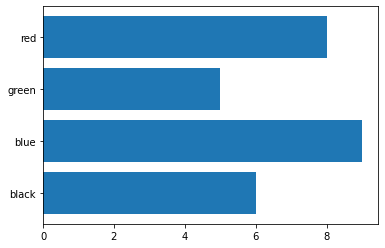

In [14]:
UniqueColor, FrequencyOfColor = np.unique(Color, return_counts=True)
print(" The variable contains",len(UniqueColor),"different colors.")
plt.barh(y=UniqueColor, width=FrequencyOfColor);

###  Effect of Category Binning
Binning categories of a variable simplifies the variable.  Compare the bar charts of the original variable and the binned variable.  Note the reduction in complexity.  The reduced complexity will be beneficial for machine learning.

No code provided.